# Customer Segmentation with K-means clustering 💸

In this notebook I will be performing unsupervised clustering on a database of customers at a grocery store. The goal is to segment users based on their purchasing behaviour. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. This allows the business to cater to the distinct needs and behaviours of the customers.


I will give step by step an unsupervised clustering pipeline using K-means. Accompanying this jupyter notebook is a streamlit app in which you can more interactively explore the results

## Dataset Description 📅

The customer personality analysis dataset (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download) is a synthetic marketing dataset. It is well-suited for unsupervised learning tasks such as clustering and RFM analysis. The dataset is specifically desgined to mimic that which you might find in a retail company which sells consumer goods (food, jewellery, household items).

### Feature Description

#### 👤 People Attributes

| Column Name      | Description                                                  |
|------------------|--------------------------------------------------------------|
| `ID`             | Customer's unique identifier                                 |
| `Year_Birth`     | Customer's birth year                                        |
| `Education`      | Customer's education level                                   |
| `Marital_Status` | Customer's marital status                                    |
| `Income`         | Customer's yearly household income                           |
| `Kidhome`        | Number of children in customer's household                   |
| `Teenhome`       | Number of teenagers in customer's household                  |
| `Dt_Customer`    | Date of customer's enrollment with the company               |
| `Recency`        | Number of days since customer's last purchase                |
| `Complain`       | 1 if the customer complained in the last 2 years, 0 otherwise|

#### 🍷 Product Spending

| Column Name         | Description                                  |
|---------------------|----------------------------------------------|
| `MntWines`          | Amount spent on wine in last 2 years         |
| `MntFruits`         | Amount spent on fruits in last 2 years       |
| `MntMeatProducts`   | Amount spent on meat in last 2 years         |
| `MntFishProducts`   | Amount spent on fish in last 2 years         |
| `MntSweetProducts`  | Amount spent on sweets in last 2 years       |
| `MntGoldProds`      | Amount spent on gold in last 2 years         |

#### 🎯 Promotion & Campaign Response

| Column Name      | Description                                               |
|------------------|-----------------------------------------------------------|
| `NumDealsPurchases` | Number of purchases made with a discount               |
| `AcceptedCmp1`   | 1 if customer accepted the offer in the 1st campaign      |
| `AcceptedCmp2`   | 1 if customer accepted the offer in the 2nd campaign      |
| `AcceptedCmp3`   | 1 if customer accepted the offer in the 3rd campaign      |
| `AcceptedCmp4`   | 1 if customer accepted the offer in the 4th campaign      |
| `AcceptedCmp5`   | 1 if customer accepted the offer in the 5th campaign      |
| `Response`       | 1 if customer accepted the offer in the last campaign     |

#### 🌍 Purchase Channels

| Column Name           | Description                                                      |
|-----------------------|------------------------------------------------------------------|
| `NumWebPurchases`     | Number of purchases made through the company’s website           |
| `NumCatalogPurchases` | Number of purchases made using a catalogue                       |
| `NumStorePurchases`   | Number of purchases made directly in stores                      |
| `NumWebVisitsMonth`   | Number of visits to company’s website in the last month          |



## Data Exploration

We will start by exploring the above features.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Read in the data
data = pd.read_csv("marketing_campaign.csv", sep = "\t")

# View the first five rows
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
# Get more information about the variable types, number of rows etc...
data.info()

# So there are 29 columns, 2240 entries, and the vast majority of variables are stored as integers
# some objects e.g. education
# floats e.g. income



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
# Lets describe all the numeric variables
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
# A quick scan of the data indicates that incomme has some missingness (2216 observations vs 2240 total). Lets check if any other variables have any missingness

data.isnull().sum()

# this confirms that only income has any missingness
# we will have to deal with this in some way later - as it is low we will just drop the missing values
# however if there was more missingness, good practice would be to make a dummy variable indicating missingness, as this could characterise customers better
# we could also impute if necessary


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data = data.dropna()

### Data Cleaning 🧹

In this section I will perform:
* Data Cleaning
* Feature Engineering


In [6]:
# Lets once again look at the info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In addition to missingness in salary, we can also notice that Dt_customer is parsed as an object rather than DateTime (as a reminder this is the date a customer joined the company)

We can do some feature engineering here - we can represent dates as the number of days a customer has been registered with the company (relative to the most recent date in the dataset)

In [7]:
# Convert to dates
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
# At the moment we have date-times
# We will cycle through to convert to dates
dates = []
for i in data["Dt_Customer"]:
    dates.append(i.date())

# Create a max_date variable
max_date = max(dates)
days = []

for date in dates:
    days.append(max_date - date)

data["Days"] = days
data["Days"] = pd.to_numeric(data["Days"], errors="coerce")


Lets now explore the categorical features. We may wish to encode them in some way.

In [8]:
# Check which features are categorical
print(data.select_dtypes(include=['object', 'category']).columns, "\n")

# We can see that only Education and Marital Status are categorical
print("Total for the categories in Education \n", data["Education"].value_counts(), "\n")

print("Total for the categories in Marital_Status \n", data["Marital_Status"].value_counts())

Index(['Education', 'Marital_Status'], dtype='object') 

Total for the categories in Education 
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Total for the categories in Marital_Status 
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


We can see that neither Education nor Marital Status have two many categories. It may be sensible to just one-hot encode them, however we can probably also perform some feature engineering

### Demographic Features

In [9]:
# Age
data["Age"] = max_date.today().year - data["Year_Birth"]

# Has_Partner
data["Has_Partner"] = data["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Single": "Single",
    "Divorced": "Single",
    "Widow": "Single",
    "Alone": "Single",
    "Absurd": "Single",
    "YOLO": "Single"
})


# Family_Size: self + partner (if any) + kids + teens
data["Partner_Flag"] = data["Has_Partner"].map({"Partner": 1, "Single": 0})
data["Family_Size"] = 1 + data["Partner_Flag"] + data["Kidhome"] + data["Teenhome"]
data.drop("Partner_Flag", axis=1, inplace=True)

# Has_Kids
data["Has_Kids"] = ((data["Kidhome"] + data["Teenhome"]) > 0).astype(int)

### Purchasing Features

In [10]:
# Money_Spent
data["Money_Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

# Essential Share
data["Essential_Share"] = (data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]) / data["Money_Spent"]

# Luxury Share
data["Luxury_Share"] = data["MntGoldProds"] / data["Money_Spent"]

In [11]:
#Dropping some of the redundant features
data = data.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Days,Age,Family_Size,Has_Kids,Money_Spent,Essential_Share,Luxury_Share
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.013538,0.009477,0.150271,4.423735e+16,56.179603,2.592509,0.714350,607.075361,0.370385,0.120167
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.115588,0.096907,0.357417,2.008532e+16,11.985554,0.905722,0.451825,602.900476,0.169361,0.108892
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,29.000000,1.000000,0.000000,5.000000,0.021661,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,2.937600e+16,48.000000,2.000000,0.000000,69.000000,0.233047,0.038081
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,4.432320e+16,55.000000,3.000000,1.000000,396.500000,0.373786,0.085941
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,5.927040e+16,66.000000,3.000000,1.000000,1048.000000,0.494826,0.169912
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,9.184320e+16,132.000000,5.000000,1.000000,2525.000000,0.998266,0.894150


## Exploratory Analysis

Relative Plot of Some Selected Features: A Data Subset


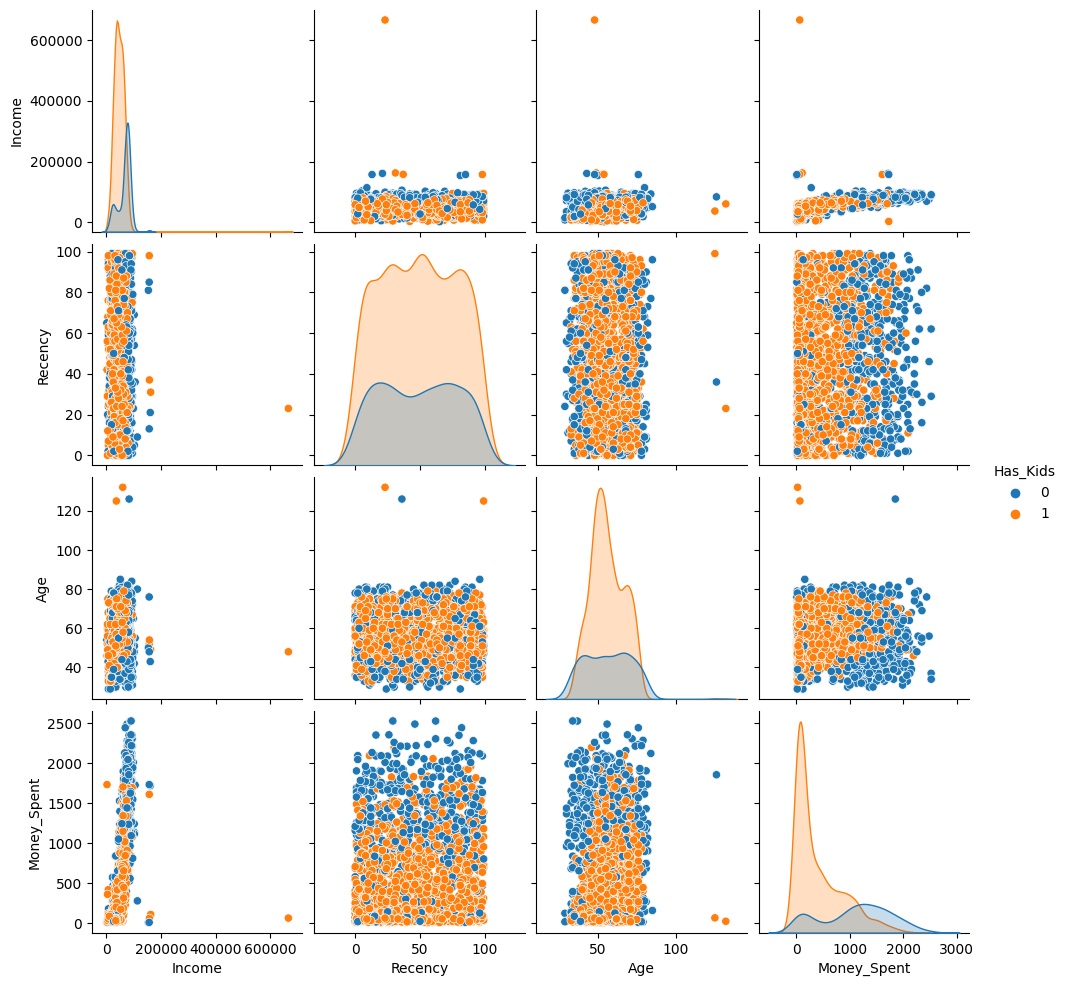

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

# To plot some selected features
To_Plot = ["Income", "Recency", "Age", "Money_Spent", "Has_Kids"]

print("Relative Plot of Some Selected Features: A Data Subset")

# Make sure Is_Parent is categorical if necessary
data["Has_Kids"] = data["Has_Kids"].astype(str)

sns.pairplot(data[To_Plot], hue="Has_Kids")
plt.show()


There are a few outliers in income and age, which we will delete

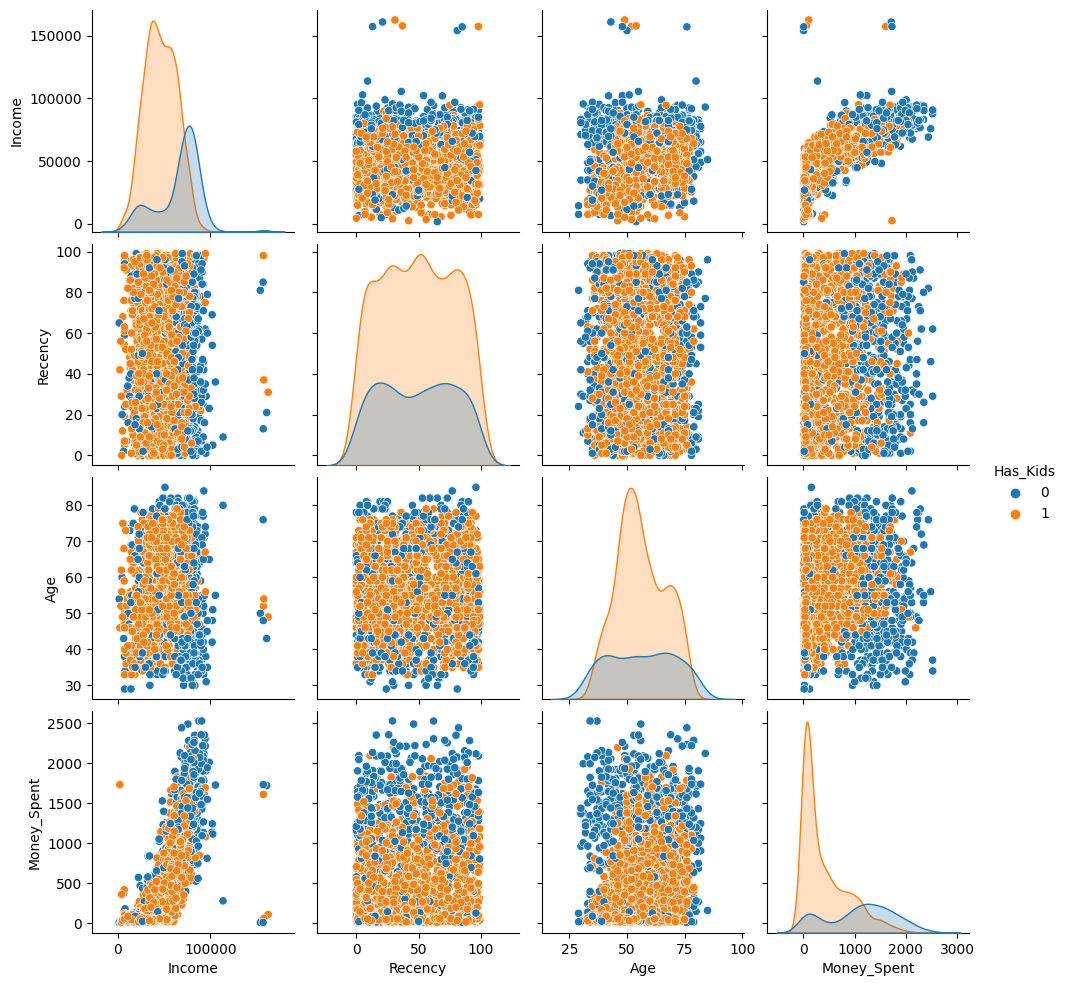

In [13]:
data = data[(data["Age"] < 100)]
data = data[(data["Income"] < 200000)]
sns.pairplot(data[To_Plot], hue="Has_Kids")
plt.show()

<AxesSubplot:>

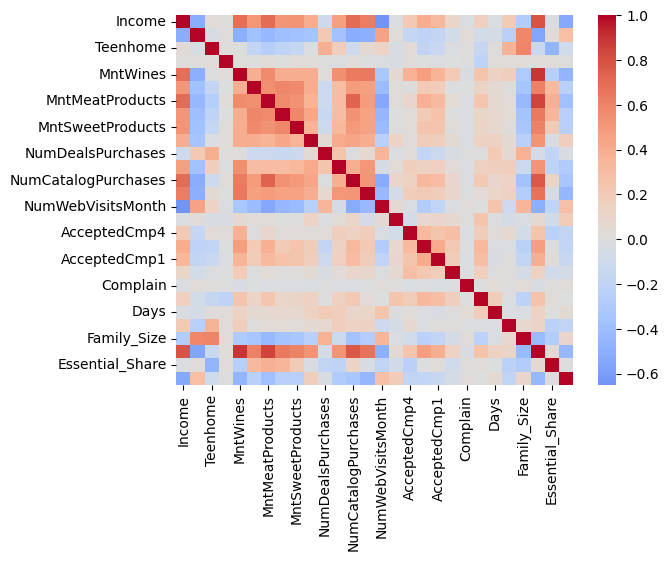

In [14]:
# Lets look at feature correlations
sns.heatmap(data.corr(), cmap="coolwarm", center=0, annot=False)

## Data Preprocessing

We will now one-hot encode any remaining categorical features. It is important not to label encode as the categorical features are not ordinal.
Lets first check which features are categorical 

In [15]:
categorical_cols = data.select_dtypes(include=["object","category"]).columns
print(categorical_cols)

Index(['Education', 'Has_Partner', 'Has_Kids'], dtype='object')


Now lets one hot encode "Education", "Has_Partner" and "Has_Kids", and then remove the original variables from the dataset

In [16]:
data = pd.get_dummies(data, columns = categorical_cols, drop_first=True)
print("All features are now numerical")

All features are now numerical


In order for the clustering to be effective, we need to make sure the features are on the same scale. To do this, we will perform Z-score normalisation (standardisation) which works as follows:
\begin{equation}
    z_i = \frac{x_i-\mu}{\sigma}
\end{equation}



In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data), columns = data.columns)


So scaled_data is now the scaled data which we can perform clustering on

In [18]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_data.head()

Dataframe to be used for further modelling:


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Family_Size,Money_Spent,Essential_Share,Luxury_Share,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Has_Partner_Single,Has_Kids_1
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,-1.758359,1.676245,0.757601,-0.602949,-0.158187,0.991895,-0.444542,-0.526437,1.349603,-1.581139
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,0.449070,-0.963297,-0.217567,0.939234,-0.158187,0.991895,-0.444542,-0.526437,1.349603,0.632456
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,-0.654644,0.280110,-0.001935,-0.605688,-0.158187,0.991895,-0.444542,-0.526437,-0.740959,-1.581139
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,0.449070,-0.920135,1.602457,-0.236081,-0.158187,0.991895,-0.444542,-0.526437,-0.740959,0.632456
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,0.449070,-0.307562,0.710753,-0.776437,-0.158187,-1.008171,-0.444542,1.899561,-0.740959,0.632456


## Dimensionality Reduction

We will now perform dimensionality reduction. This is important as there may be a high amount of multicolinearity between variables (see the correlation plot). We can do PCA to reduce the number of features to essentially uncorrelated prinical components, each of which explains a different proportion of the variance. The PCs are orthogonal to each other. PCA will also minimize information loss

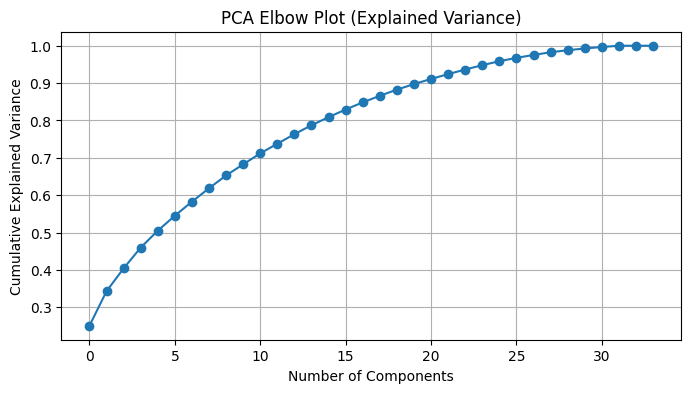

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot (Explained Variance)')
plt.grid(True)
plt.show()


The plot doesn't have a significant elbow. Lets say that we want to keep 80% of explained variance

In [20]:
pca = PCA(n_components=0.80)  # Keep enough components to explain 80% variance
pca_data = pca.fit_transform(scaled_data)

## K-Means Clustering

Finally lets perform K-Means clustering on the data. We will perform the clustering for different values of K, and observe the elbow plot to ultimately choose the best value

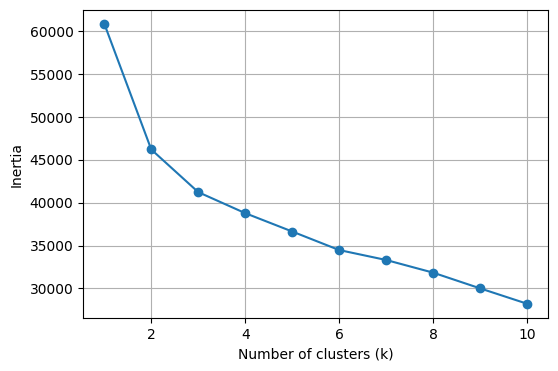

In [21]:
from sklearn.cluster import KMeans
inertia = []

for k in range(1,11):
    km = KMeans(n_clusters = k, random_state=42)
    km.fit(pca_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker = "o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


From this plot the elbow seems to flatten out between k=3 and k=4. So lets pick a value of k=3 as our number of clusters.

In [22]:
km = KMeans(n_clusters=3, random_state=42)
clusters = km.fit_predict(pca_data)
data["cluster"] = clusters

Lets visualise the clusters between the first two principal components

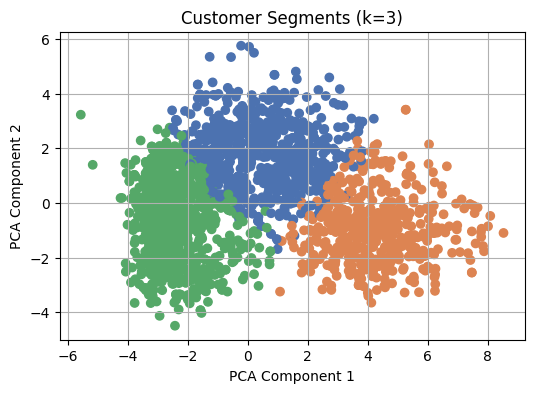

In [23]:
# Get colors from Seaborn's 'deep' palette
palette = sns.color_palette("deep")
# Map cluster labels to color indices
data["Cluster"] = clusters
cluster_colors = data["Cluster"].map(lambda x: palette[x])

plt.figure(figsize=(6, 4))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_colors)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments (k=3)")
plt.grid(True)
plt.show()

## Evaluating the clustering


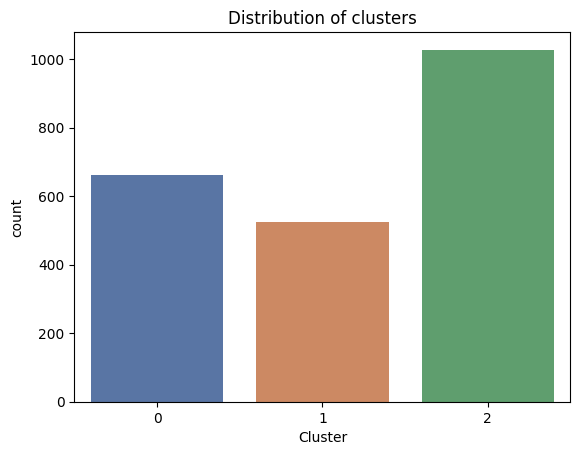

In [24]:
pl = sns.countplot(x=data["Cluster"], palette=palette)
pl.set_title("Distribution of clusters")
plt.show()

Clusters are relative evenly distributed, so this is good

Lets look at a plot of income vs spending, with points coloured by cluster. This may help us to get a handle on whether there are differences between the types of customer spending habits in each cluster

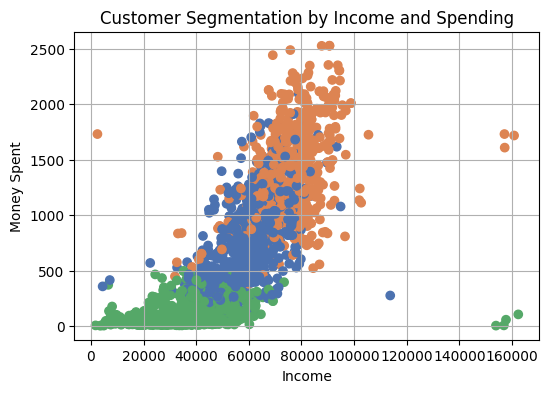

In [25]:
# Plot using Matplotlib with Seaborn colors
plt.figure(figsize=(6, 4))
plt.scatter(data["Income"], data["Money_Spent"], c=cluster_colors)
plt.xlabel("Income")
plt.ylabel("Money Spent")
plt.title("Customer Segmentation by Income and Spending")
plt.grid(True)
plt.show()

While there is overlap, we can probably characterise the clusters as a low-income/low-spending, mid-income\mid-spending and mid-income\high-spending. The income does not seem to differ much between groups 2 and 3, but one spends more than the other.

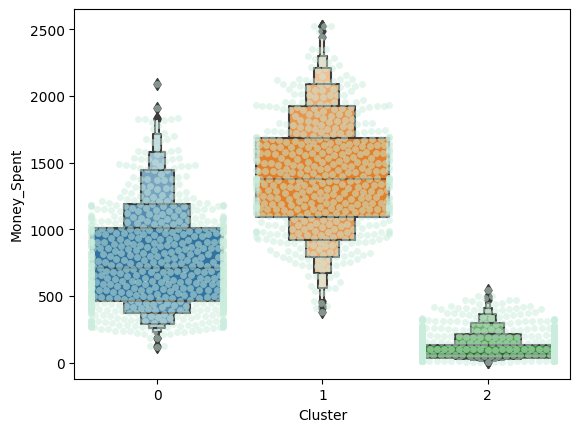

In [26]:
plt.figure()
pl=sns.swarmplot(x=data["Cluster"], y=data["Money_Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Cluster"], y=data["Money_Spent"])
plt.show()

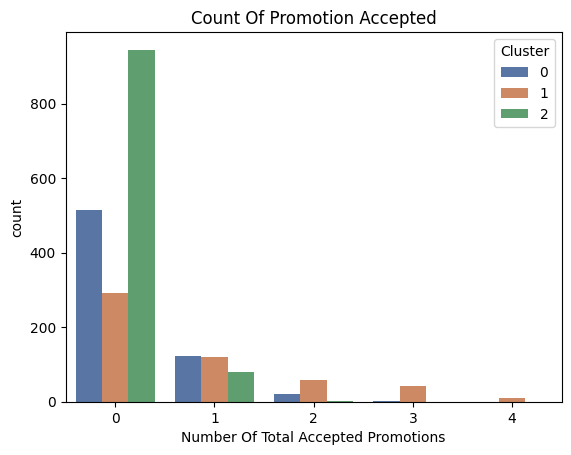

In [27]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Cluster"], palette= palette)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

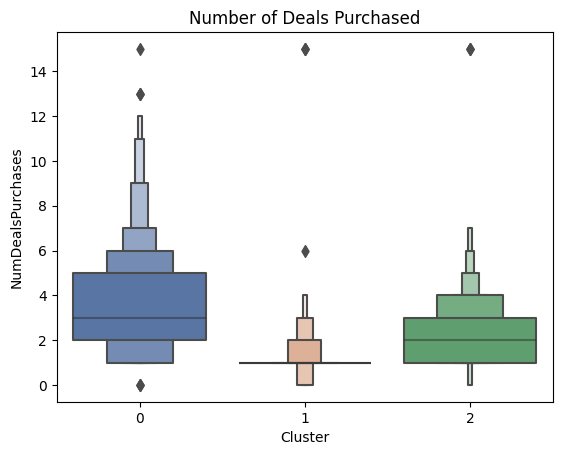

In [28]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Cluster"], palette= palette)
pl.set_title("Number of Deals Purchased")
plt.show()

## Profiling

We are going to create bivariate, kernel density estimation plots. This shows the estimated joint distribution between each specified feature and money spent, broken down by cluster. This means that we can get an idea as to how each profile is different to eachother among these demograph covariates.

Bear in mind that "cluster 1" is the ones we really care about - these are the high spenders, and it would be good to create marketing campaigns which target these customers.

<Figure size 640x480 with 0 Axes>

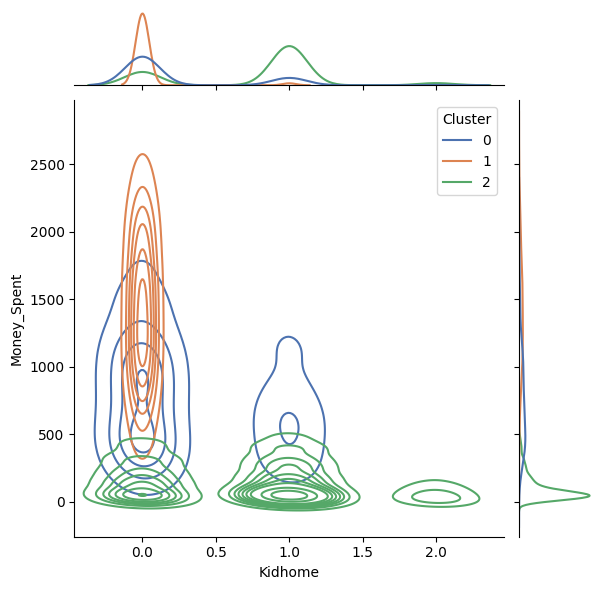

<Figure size 640x480 with 0 Axes>

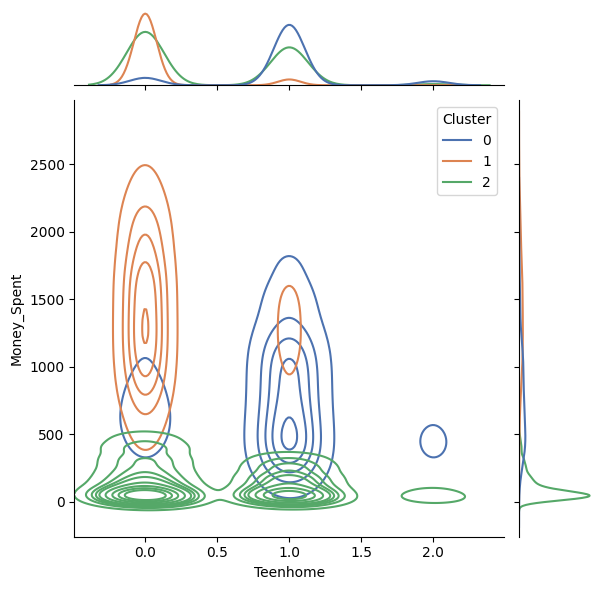

<Figure size 640x480 with 0 Axes>

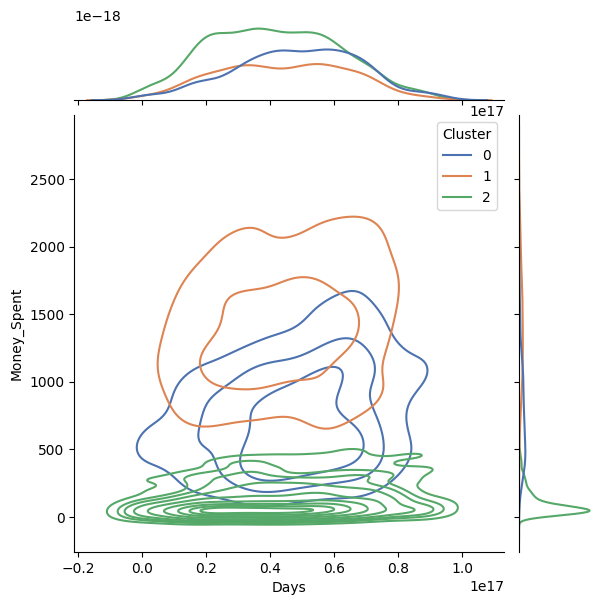

<Figure size 640x480 with 0 Axes>

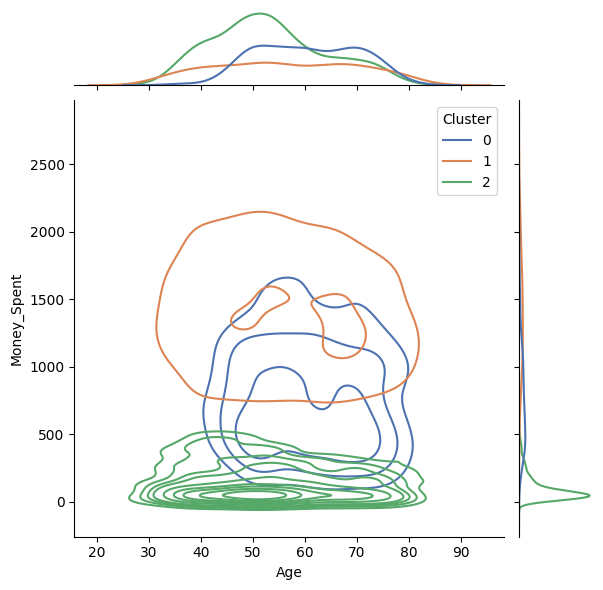

<Figure size 640x480 with 0 Axes>

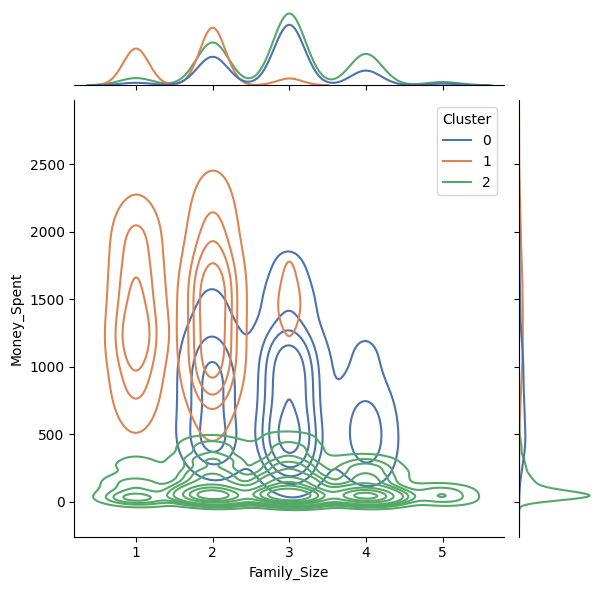

<Figure size 640x480 with 0 Axes>

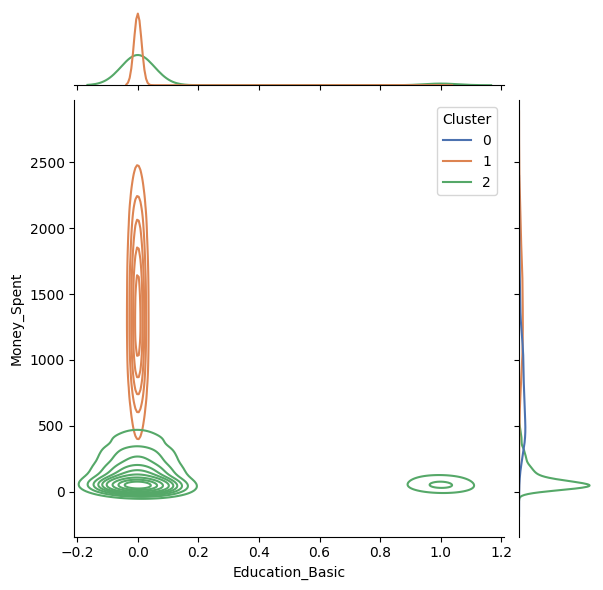

<Figure size 640x480 with 0 Axes>

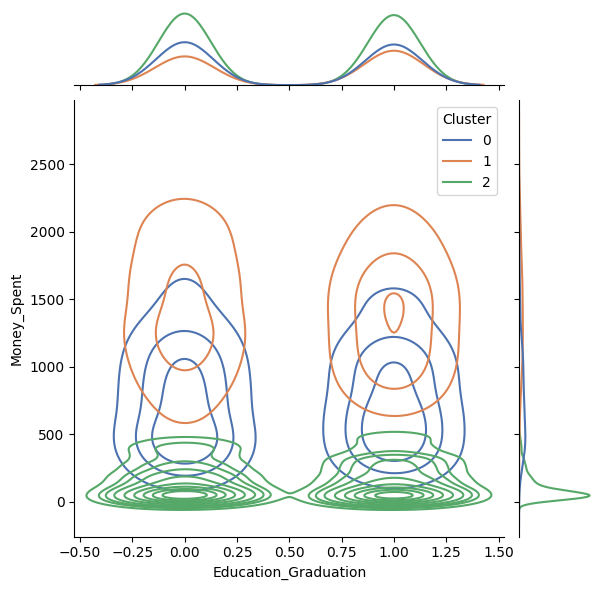

<Figure size 640x480 with 0 Axes>

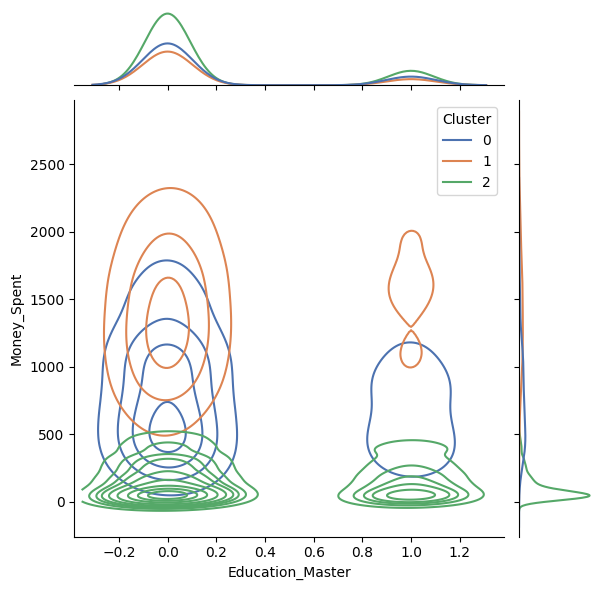

<Figure size 640x480 with 0 Axes>

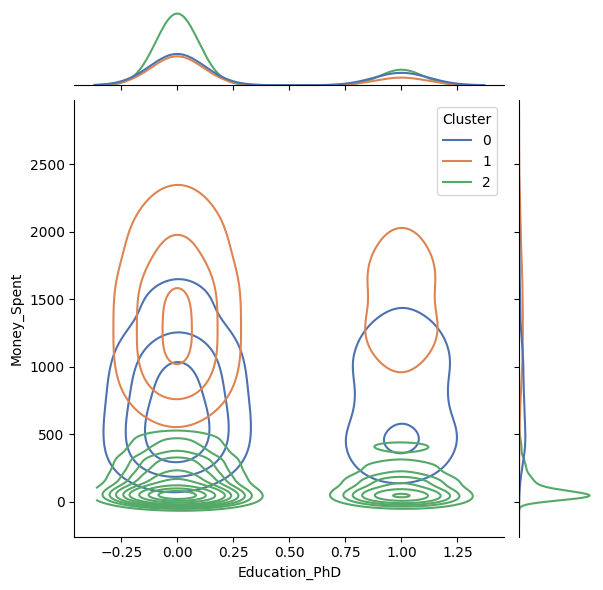

In [31]:
Personal = [ "Kidhome","Teenhome","Days", "Age", "Family_Size", "Education_Basic", "Education_Graduation", "Education_Master","Education_PhD"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Money_Spent"], hue =data["Cluster"], kind="kde", palette=palette)
    plt.show()

What have we learnt about cluster 1? They have few (if any) children, and their family size is typically 1 or 2 - indicating they live alone or with a partner. They have above average income, and typically have at least a college education. All clusters have wide age ranges, although cluster 0 skews slightly older. 

Interestingly, our target cluster 1 accept purchase fewer deals and accept fewer promotions, despite spending and earning more than other groups. This may be because there are fewer deals available for the items they purchase. More information is needed to know if this impacts a potential marketing strategy - perhaps there are fewer promotions/deals for high value items, and this is why these customers have lower values. Or perhaps these customers are less easily influenced, and would be made to spend more via other means.